In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
import itertools
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

In [42]:
df1 = pd.read_csv('C:/Users/Ramya/Desktop/Skin_lesion_classification/HAM10000_metadata.csv')

In [43]:
df1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [45]:
df1.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [46]:
df1.shape

(10015, 7)

In [47]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Bening keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_dir = 'C:/Users/Ramya/Desktop/Skin_lesion_classification/Data'

In [48]:
image_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_dir, '*', '*.jpg'))}

In [50]:
df1['path'] = df1['image_id'].map(image_dict.get)
df1['cell_type'] = df1['dx'].map(lesion_type_dict.get)
df1['cell_type_idx'] = pd.Categorical(df1['cell_type']).codes

In [51]:
df1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/Ramya/Desktop/Skin_lesion_classificat...,Bening keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/Ramya/Desktop/Skin_lesion_classificat...,Bening keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/Ramya/Desktop/Skin_lesion_classificat...,Bening keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/Ramya/Desktop/Skin_lesion_classificat...,Bening keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/Ramya/Desktop/Skin_lesion_classificat...,Bening keratosis-like lesions,2


In [52]:
df1.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [53]:
df1['age'].fillna((df1['age'].mean()), inplace=True)

In [54]:
df1.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

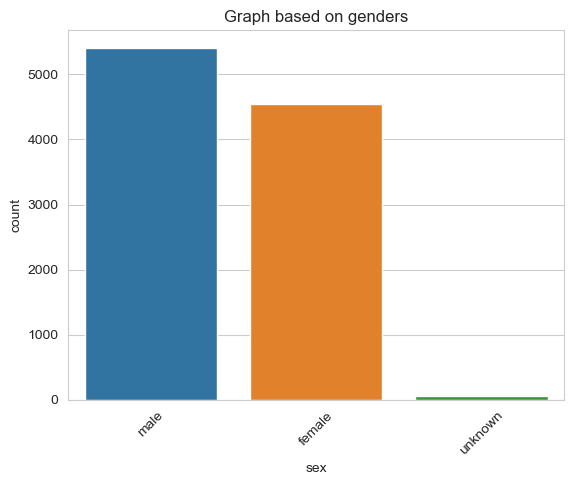

In [56]:
#EXPLORATORY DATA ANALYSIS
ax = sns.countplot(x = 'sex', data = df)
plt.title('Graph based on genders')
plt.xticks(rotation=45)
plt.show()

In [57]:
df1['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

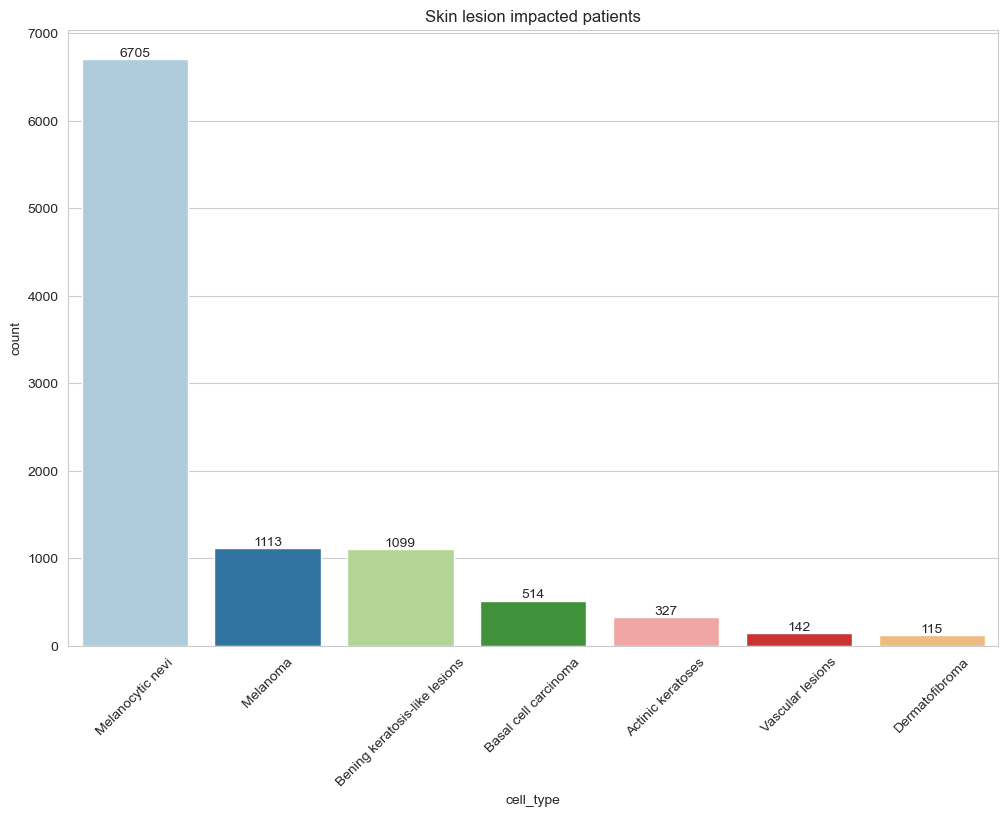

In [58]:
#CELL TYPE AFFECT ON PATIENTS
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Skin lesion impacted patients')
plt.xticks(rotation=45)
plt.show()

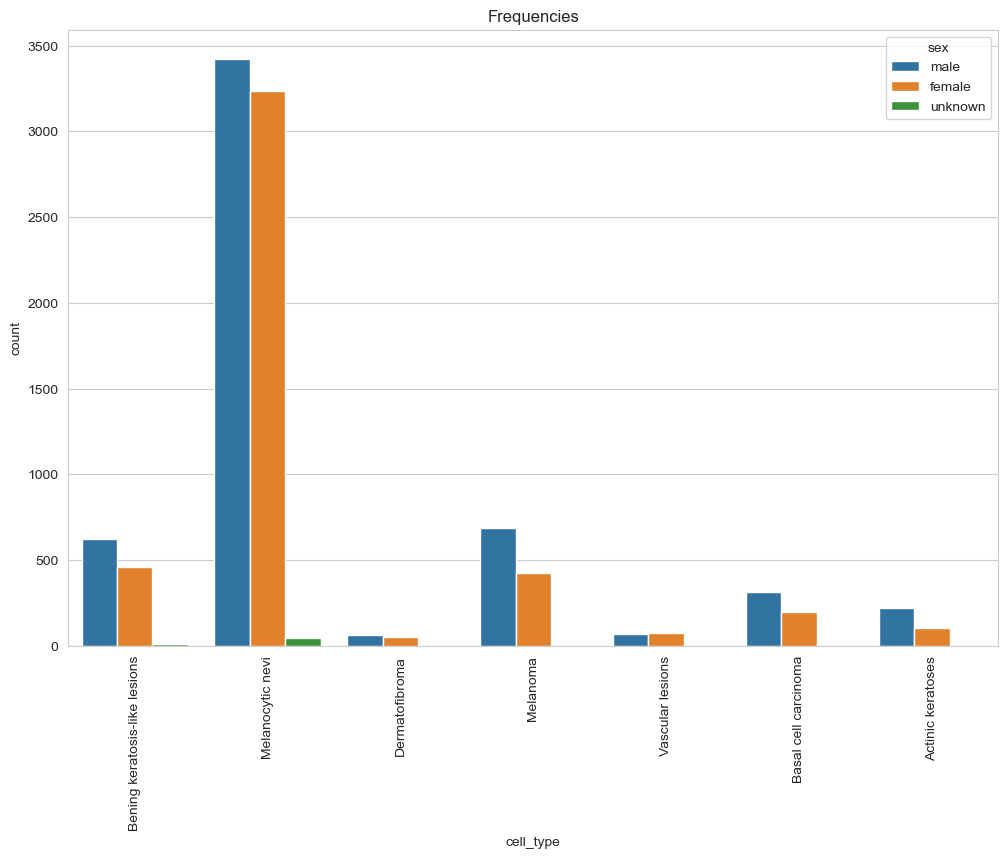

In [59]:
#GENDER VS CELL TYPE
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type', hue='sex', data = df)
plt.title('Frequencies')
plt.xticks(rotation=90)
plt.show()

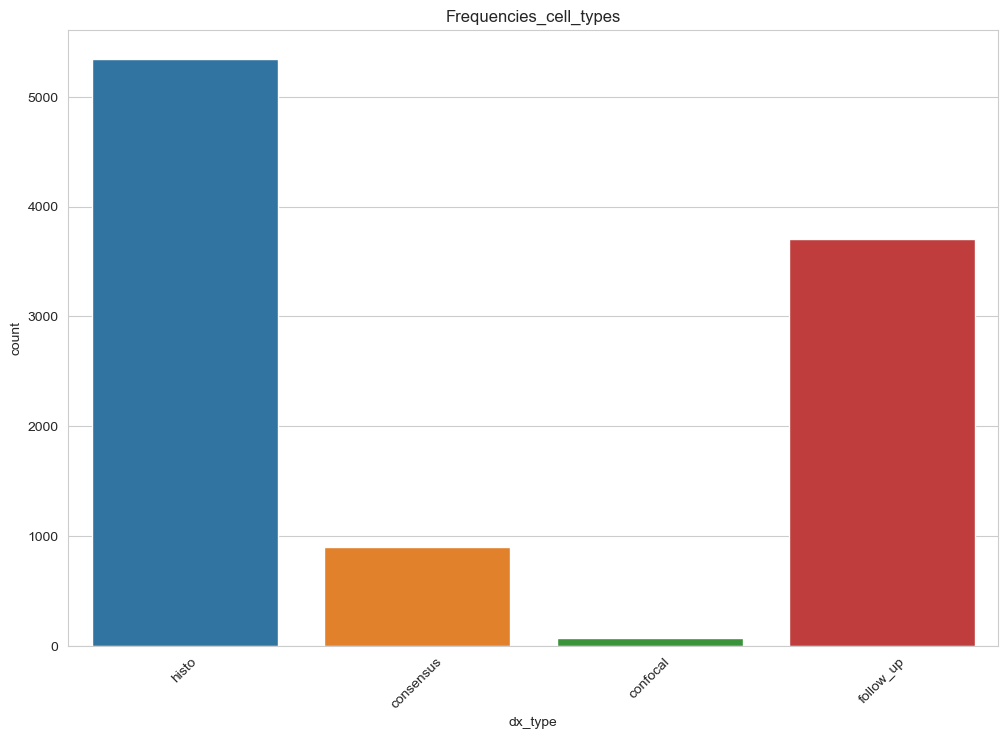

In [60]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', data=df)
plt.title('Frequencies_cell_types')
plt.xticks(rotation=45)
plt.show()

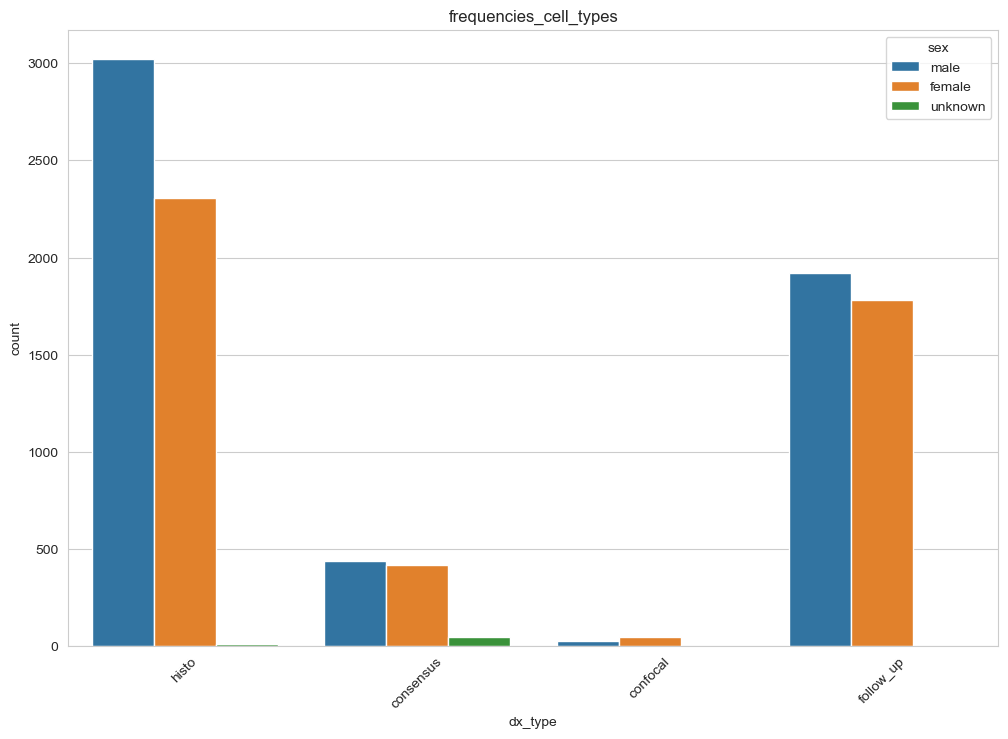

In [61]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', hue = 'sex', data = df)
plt.title('frequencies_cell_types')
plt.xticks(rotation=45)
plt.show()

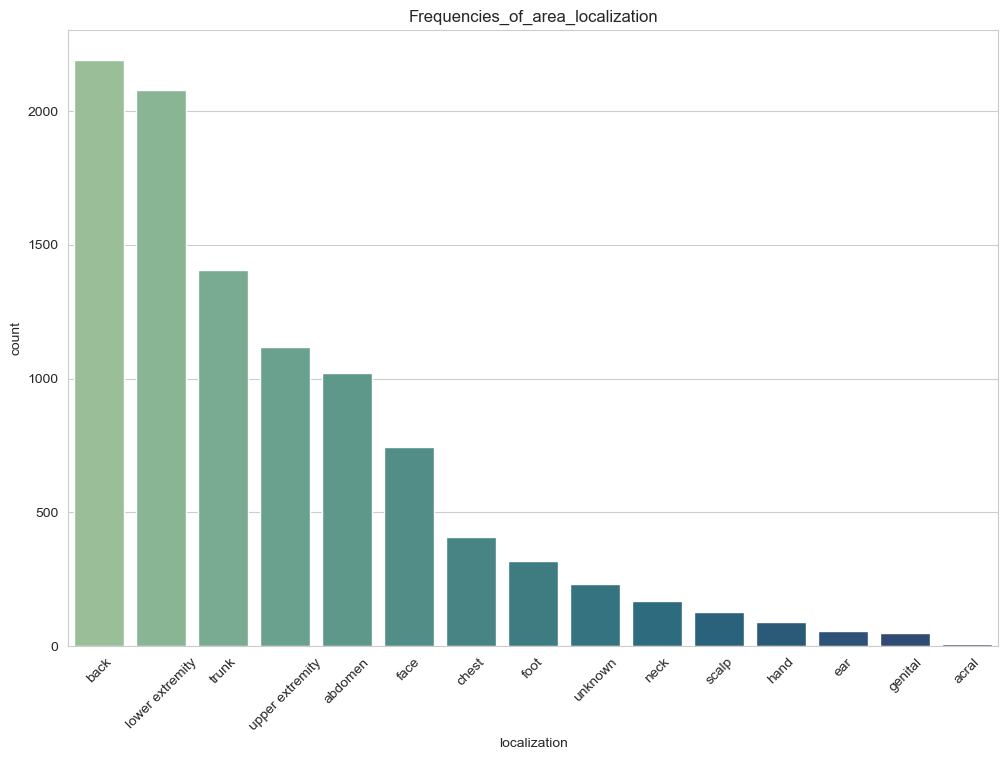

In [62]:
#LOCALIZATION
sns.set_style('whitegrid')
fig,axis = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization', data=df, order=df['localization'].value_counts().index, palette='crest')
plt.title('Frequencies_of_area_localization')
plt.xticks(rotation=45)
plt.show()

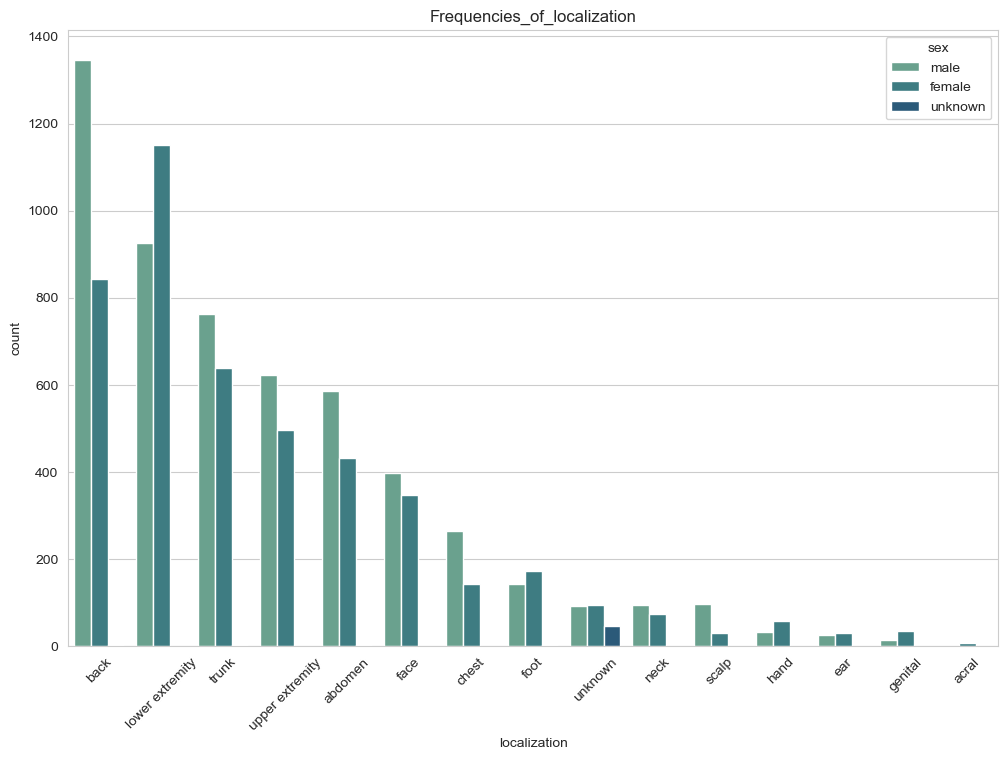

In [63]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'localization', hue = 'sex', data = df, order = df['localization'].value_counts().index, palette='crest')
plt.title('Frequencies_of_localization')
plt.xticks(rotation=45)
plt.show()

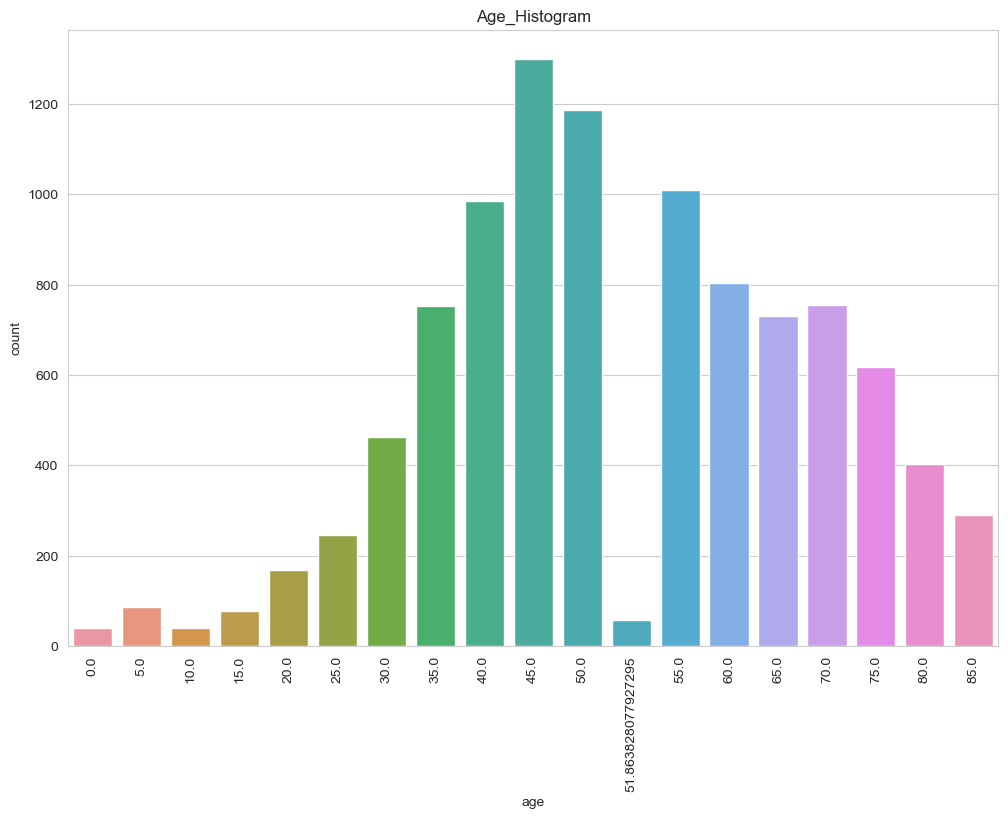

In [65]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'age', data = df)
plt.title('Age_Histogram')
plt.xticks(rotation=90)
plt.show()

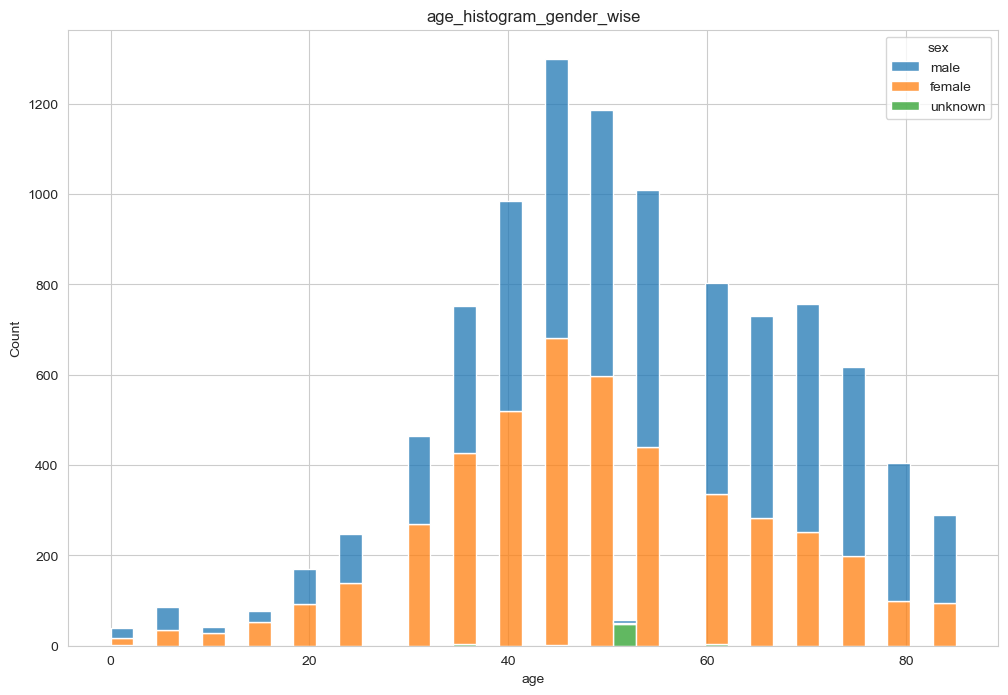

In [72]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x = 'age', hue = 'sex', multiple='stack')
plt.title('age_histogram_gender_wise')
plt.show()

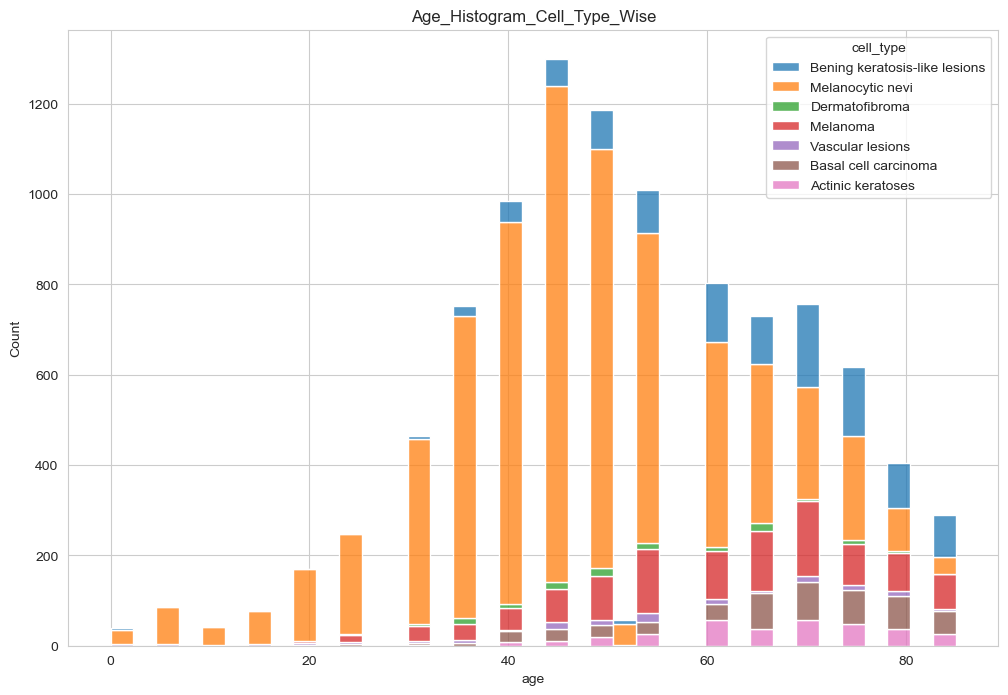

In [71]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='cell_type',multiple='stack')
plt.title('Age_Histogram_Cell_Type_Wise')
plt.show()

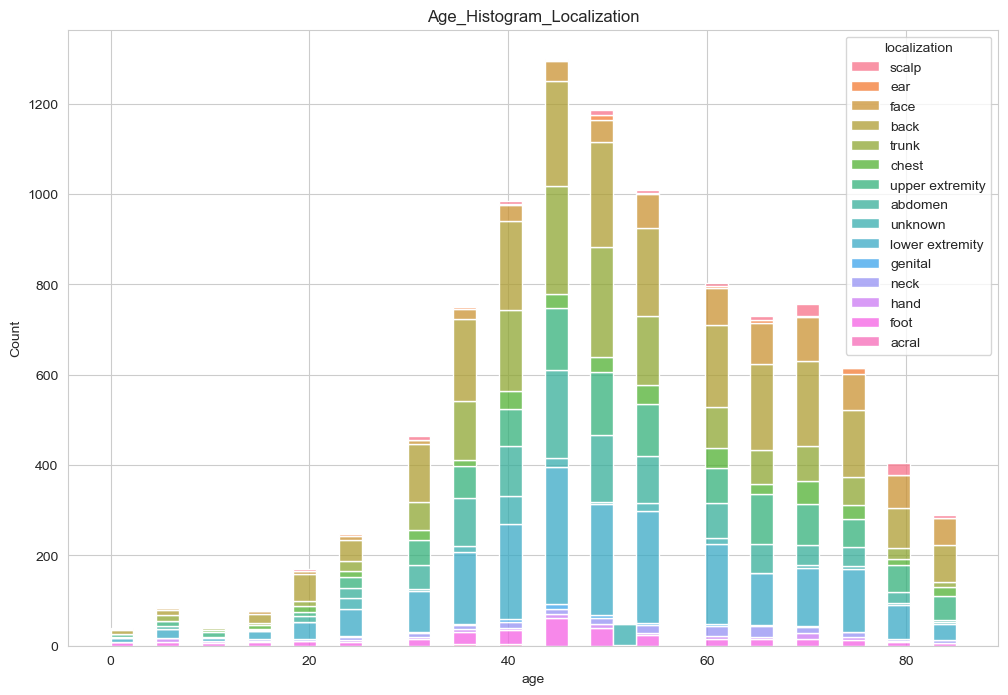

In [70]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='localization',multiple='stack')
plt.title('Age_Histogram_Localization')
plt.show()

In [26]:
import cv2

In [27]:
# Function to read and resize images
def read_and_resize_image(image_path, size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    return img

In [28]:
image_size = (64, 64)

In [29]:
# Apply the function to each image path in the 'path' column of the dataframe
df['image'] = df['path'].apply(lambda x: read_and_resize_image(x, image_size))

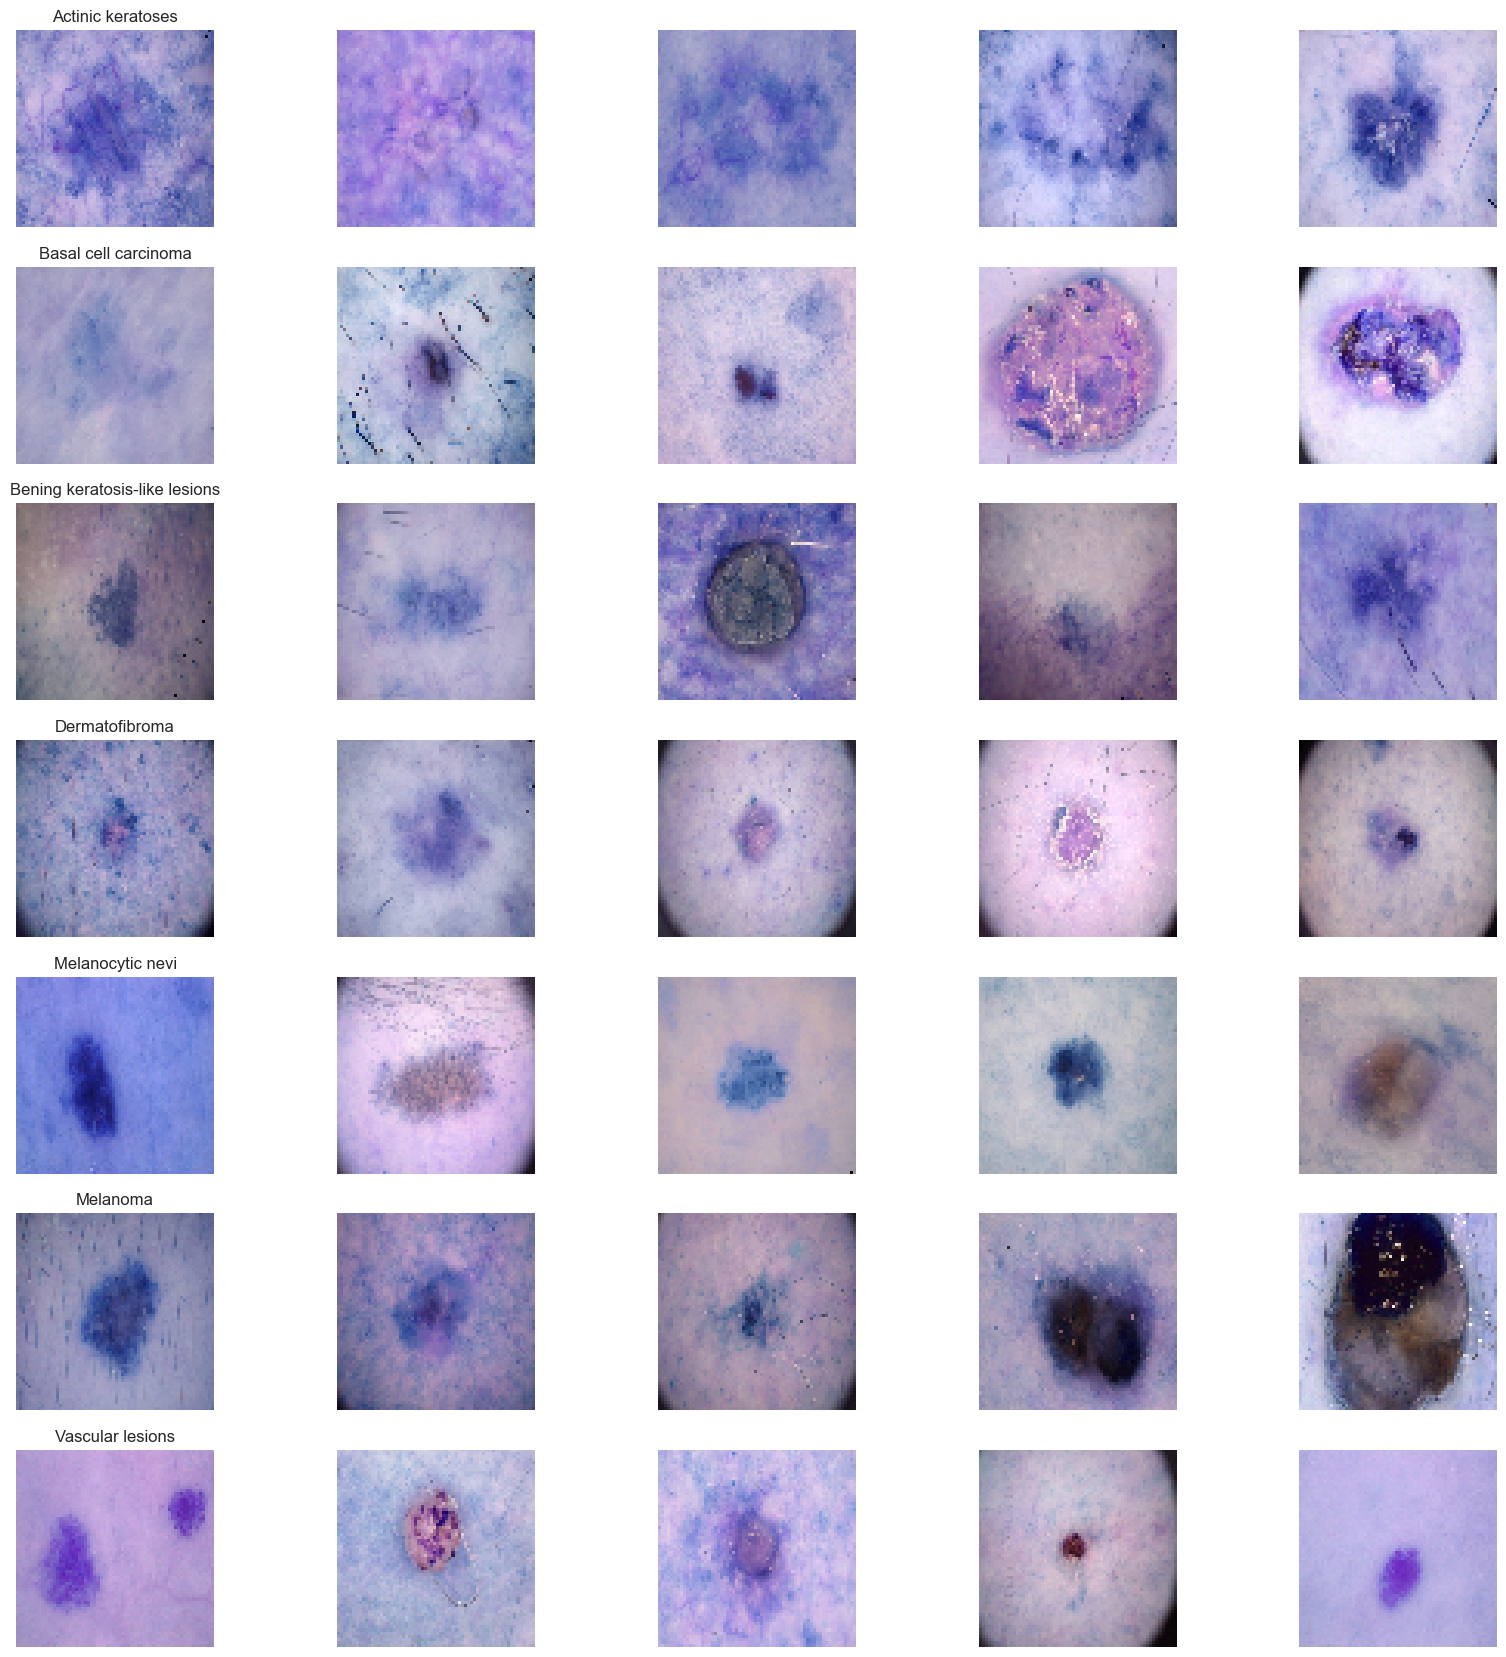

In [30]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [31]:
df1['image'].map(lambda x: x.shape).value_counts()

(64, 64, 3)    10015
Name: image, dtype: int64

In [32]:
#DATA MODELING
# Split the data into train and test sets
train_df1, test_df1 = train_test_split(df1, test_size=0.2, stratify=df1['cell_type_idx'], random_state=42)

In [33]:
# Extract the image data and target labels for train and test sets
X_train = np.stack(train_df1['image'].values)
y_train = train_df1['cell_type_idx'].values
X_test = np.stack(test_df1['image'].values)
y_test = test_df1['cell_type_idx'].values

In [34]:
#CREATING THE CNN MODEL
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(df['cell_type_idx'].unique()), activation='softmax'))

In [35]:
#MODEL COMPILATION
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
#MODEL TRAINING
model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.1)

Epoch 1/15
226/226 [==============================] - 16s 67ms/step - loss: 5.0936 - accuracy: 0.6352 - val_loss: 1.0059 - val_accuracy: 0.6808
Epoch 2/15
226/226 [==============================] - 16s 72ms/step - loss: 1.0265 - accuracy: 0.6695 - val_loss: 1.0212 - val_accuracy: 0.6771
Epoch 3/15
226/226 [==============================] - 16s 73ms/step - loss: 0.9554 - accuracy: 0.6736 - val_loss: 1.0605 - val_accuracy: 0.6870
Epoch 4/15
226/226 [==============================] - 17s 74ms/step - loss: 0.9481 - accuracy: 0.6745 - val_loss: 0.9031 - val_accuracy: 0.6933
Epoch 5/15
226/226 [==============================] - 17s 74ms/step - loss: 0.8870 - accuracy: 0.6852 - val_loss: 0.8748 - val_accuracy: 0.6870
Epoch 6/15
226/226 [==============================] - 17s 73ms/step - loss: 0.8786 - accuracy: 0.6853 - val_loss: 0.8840 - val_accuracy: 0.6908
Epoch 7/15
226/226 [==============================] - 17s 73ms/step - loss: 0.8486 - accuracy: 0.6936 - val_loss: 0.8899 - val_accuracy:

In [38]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy
accuracy = np.mean(y_pred_classes == y_test) * 100
print(f'Test accuracy: {accuracy:.2f}%')

63/63 [==============================] - 1s 15ms/step
Test accuracy: 69.35%


In [39]:
confusion_matrix(y_test , y_pred_classes)

array([[   0,    5,   15,    0,   40,    5,    0],
       [   1,   12,   20,    0,   66,    4,    0],
       [   2,    8,   60,    0,  135,   15,    0],
       [   0,    4,    8,    0,   10,    1,    0],
       [   0,    9,   28,    0, 1265,   39,    0],
       [   0,    3,   22,    0,  155,   43,    0],
       [   0,    0,    4,    0,   12,    3,    9]], dtype=int64)

<Axes: >

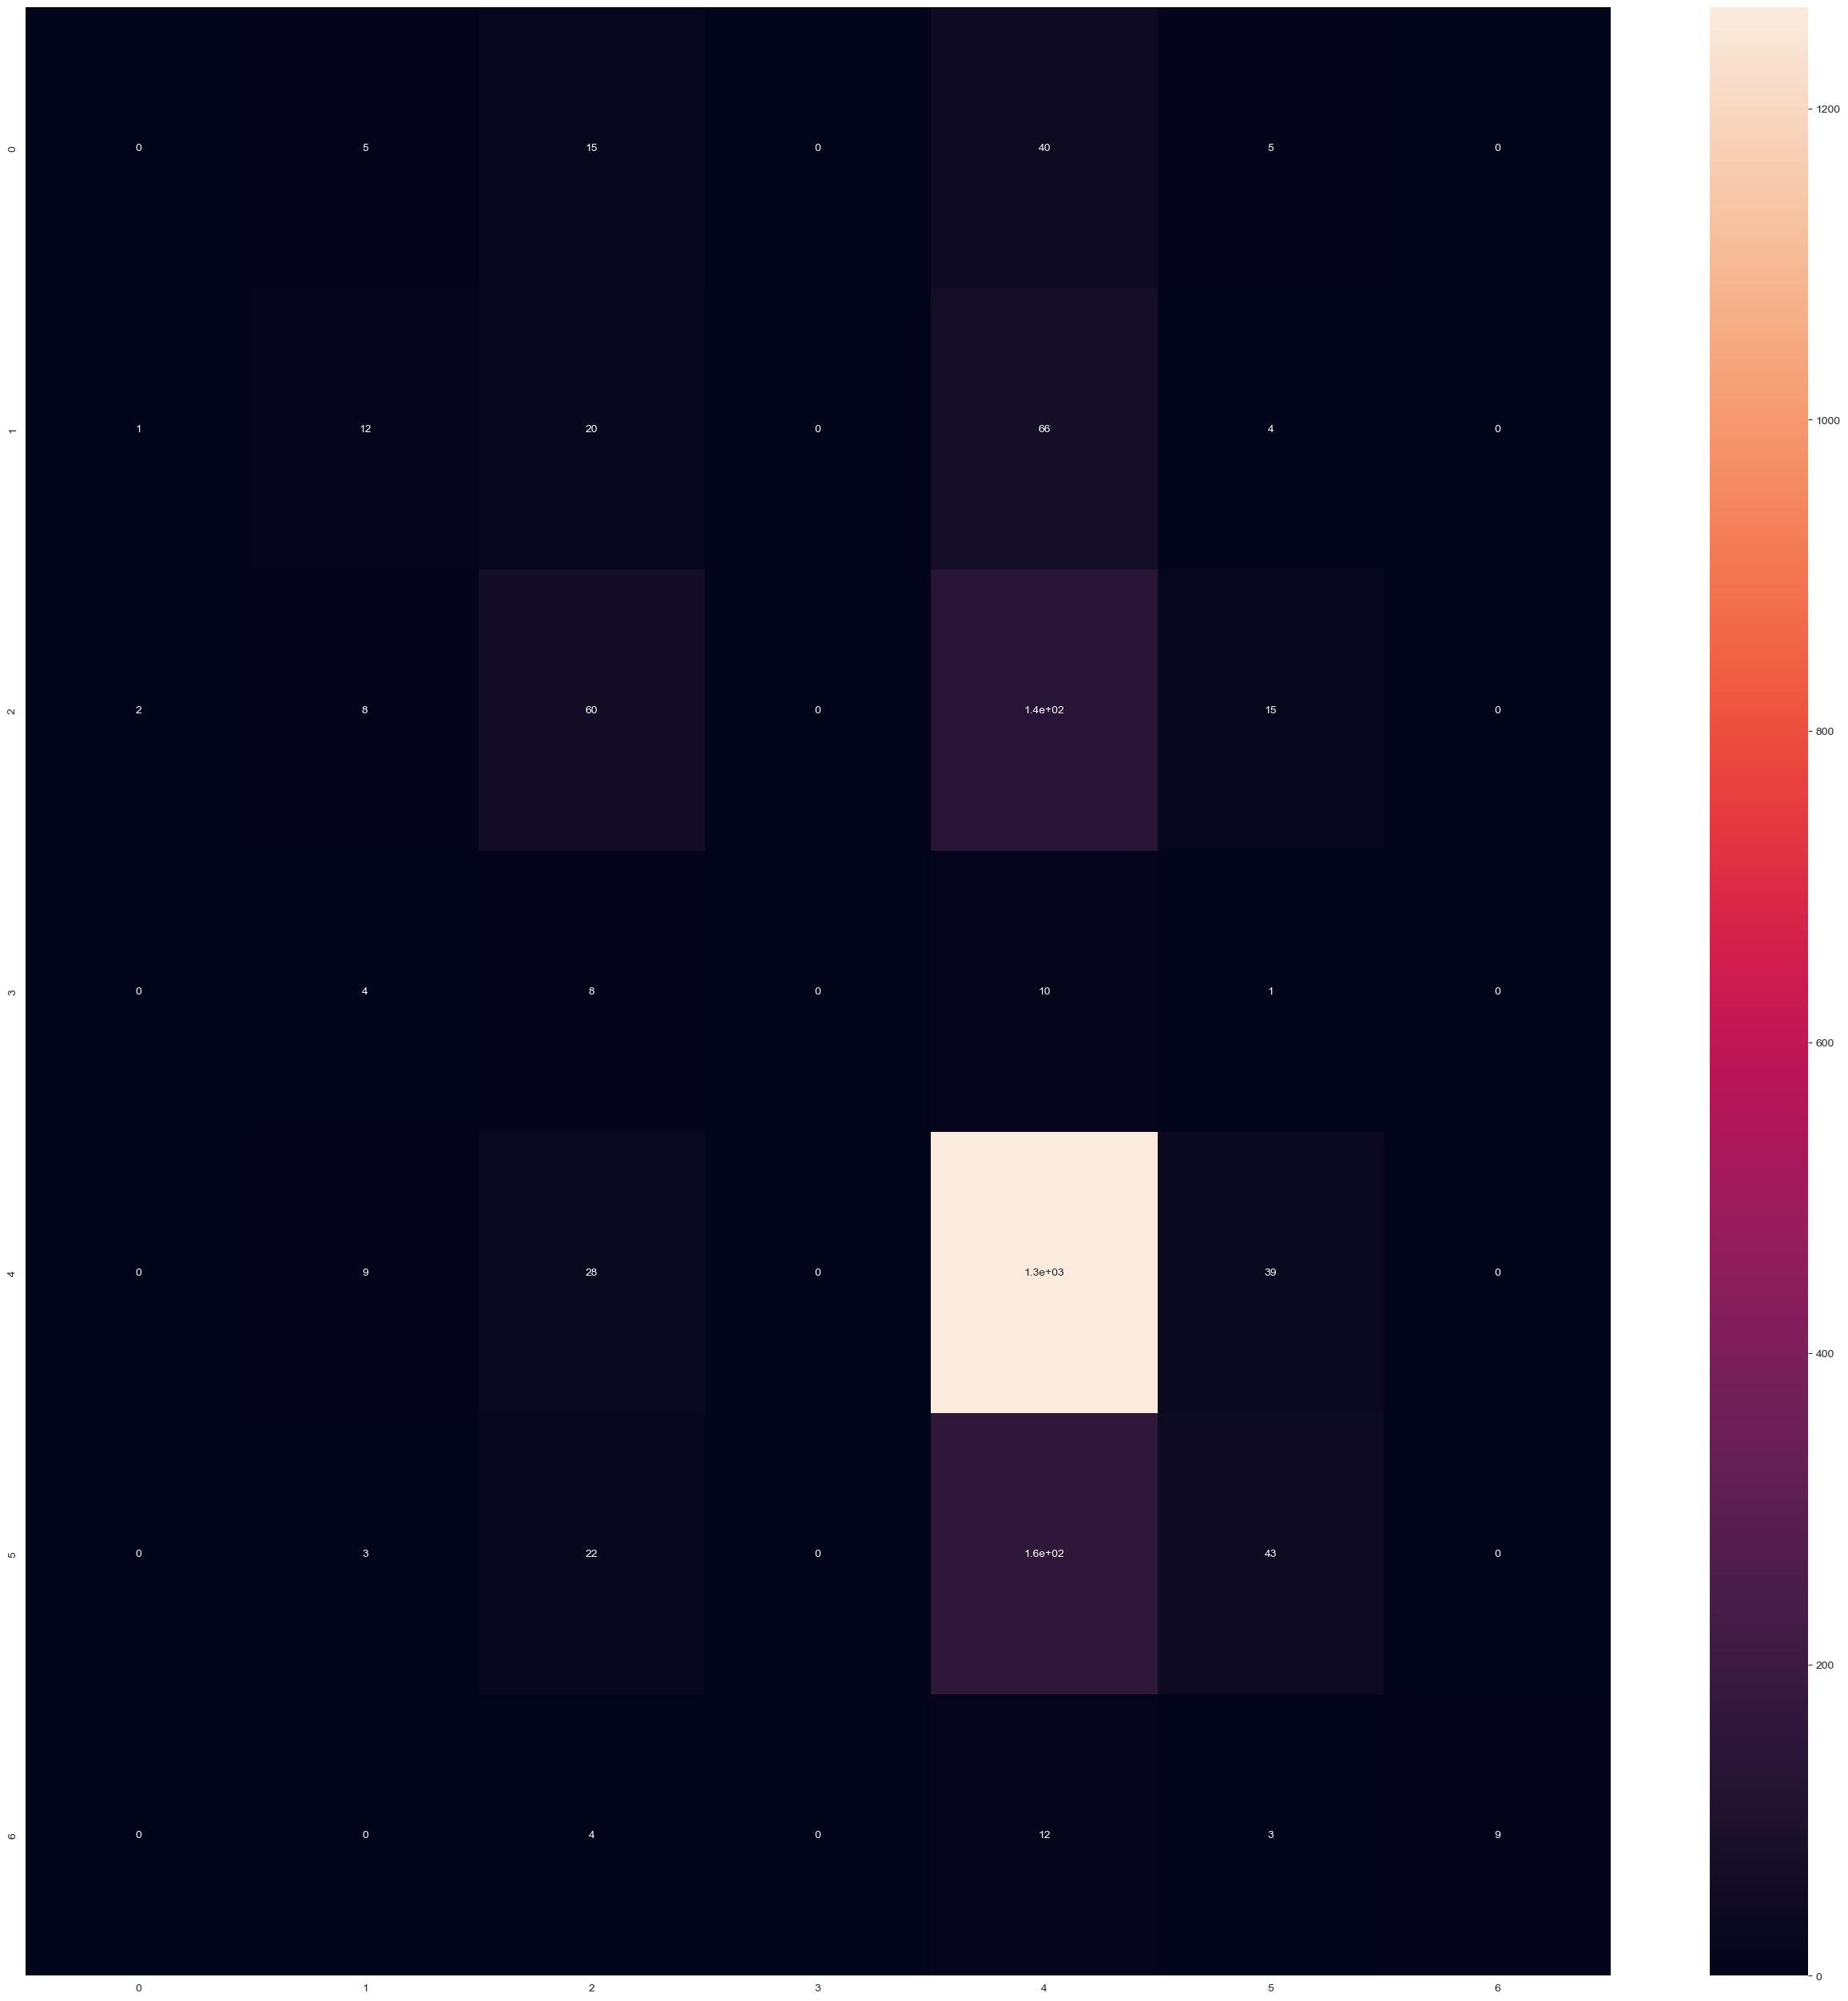

In [40]:
import seaborn as sns
plt.figure(figsize=(32,32))
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True)

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(item) for item in y_pred]
print("Classification Report :\n", classification_report(y_test , y_pred_classes))

63/63 [==============================] - 1s 14ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.29      0.12      0.17       103
           2       0.38      0.27      0.32       220
           3       0.00      0.00      0.00        23
           4       0.75      0.94      0.84      1341
           5       0.39      0.19      0.26       223
           6       1.00      0.32      0.49        28

    accuracy                           0.69      2003
   macro avg       0.40      0.26      0.30      2003
weighted avg       0.62      0.69      0.64      2003



C:\Users\Ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
